<a href="https://colab.research.google.com/github/teazaw/MAT422-Mathematical-Methods-in-Data-Science/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1.3.1 QR Decomposition**
**QR decomposition** is a mathematical method used to decompose a matrix into two components: an orthogonal matrix Q and an upper triangular matrix R. Thus, a matrix A can be expressed as: ***A=Q⋅R***

QR decompositions are useful for solving linear systems, eigenvalue problems and least squares approximations.

In [ ]:
import numpy as np
from numpy.linalg import qr
from numpy import dot


A = np.array([[3, 9, 7],
              [4, 18, 14],
              [21, 16, 13]])


Q, R = qr(A)


print("Matrix A:")
print(A)

print("Orthogonal matrix Q:")
print(Q)

print("Upper triangular matrix R:")
print(R)


print("Verification that the original matrix A is the dot product of Q and R")
print(dot(Q, R))


Matrix A:
[[ 3  9  7]
 [ 4 18 14]
 [21 16 13]]
Orthogonal matrix Q:
[[-0.13897232 -0.38827957 -0.91100257]
 [-0.18529642 -0.89348652  0.40908077]
 [-0.97280621  0.22565642  0.05222308]]
Upper triangular matrix R:
[[-21.58703314 -20.15098588 -16.21343691]
 [  0.         -15.96677075 -12.2932348 ]
 [  0.           0.           0.02901282]]
Verification that the original matrix A is the dot product of Q and R
[[ 3.  9.  7.]
 [ 4. 18. 14.]
 [21. 16. 13.]]


# **1.3.2 Least-squares Problems**
**Least-squares problems** are a class of optimization problems that involve finding the best solution that minimizes the sum of the residuals. A general least-squares problem can be expressed as:  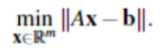


Where:
*   A is a known *m x n* matrix.
*   x is the *n*-dimensional vector of variables to solve for.
*   b is a known *m*-dimensional observation vector.

Our goal when performing a least-squares problem is to find the vector x that minimizes the differences between observed data points and the model's predictions. Therefore, some common applications of least-sqaures problems is to fit curves or lines to data.

In this example, we use a least-squares approach to determine the slope and y-intercept of the line that best fits the data points (1,1), (2,2), (3, 1.3), (4, 3.75), (5, 2.25), (6,5) and (7,6). Thus, the vector x is comprised of the slope and the y-intercept.

Slope: 0.7839285714285715
Intercept: -0.09285714285714217


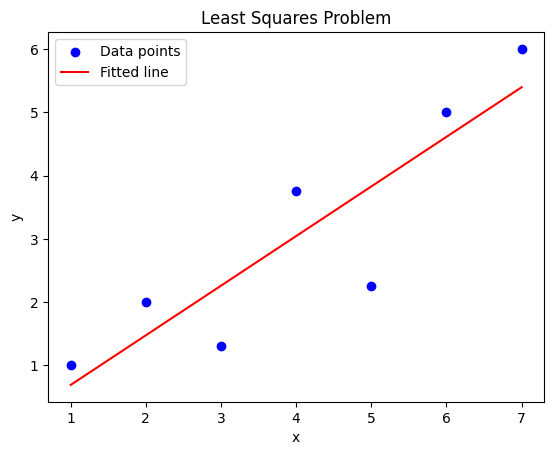

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import lstsq

x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([1, 2, 1.3, 3.75, 2.25, 5, 6])

# Create the design matrix (A) for linear regression
A = np.vstack([x, np.ones(len(x))]).T

beta, residuals, rank, s = lstsq(A, y, rcond=None)

beta_1, beta_0 = beta

print(f"Slope: {beta_1}")
print(f"Intercept: {beta_0}")

plt.scatter(x, y, color='blue', label='Data points')


plt.plot(x, beta_1 * x + beta_0, color='red', label='Fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Problem')
plt.legend()
plt.show()


We can also approach the problem via QR decomposition, as indicated below.

In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import qr
from numpy.linalg import solve

A = np.array([[1, 1], [2, 1], [3, 1], [4,1], [5,1], [6,1], [7,1]])
b = np.array([1, 2, 1.3, 3.75, 2.25, 5, 6])


Q, R = qr(A)
Q_T_b = dot(Q.T, b)
x = solve(R, Q_T_b)
slope=x[0]
intercept=x[1]
print("Least squares solution using QR decomposition:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


Least squares solution using QR decomposition:
Slope: 0.7839285714285714
Intercept: -0.09285714285714326


# **1.3.3 Linear Regression**

**Linear regression** is a method used to model the relationship between one of more independent variables, called predictors, and a dependent variable called a target. It assumes that there is a linear relationship between the variables and can therefore be represented as a straight line.

Simple linear regression assumes that there is one independent and one dependent variable, which can be modeled by the equation: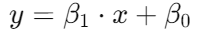

Linear regression problems can be solved through the least squares method, as the least squares method can find the optimal parameters of the line.


Slope: 0.7839285714285711
Intercept: -0.0928571428571412


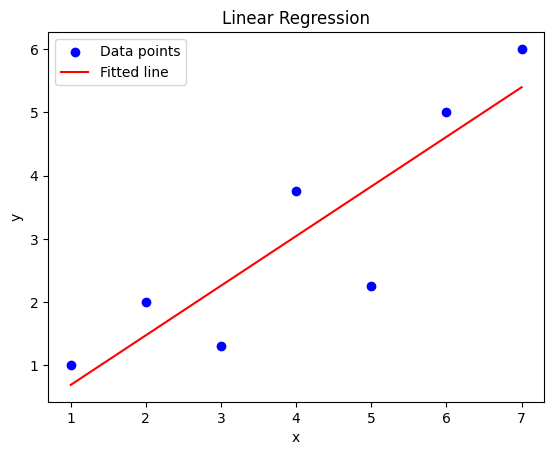

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.array([1, 2, 3, 4, 5, 6, 7]).reshape(-1, 1)
y = np.array([1, 2, 1.3, 3.75, 2.25, 5, 6])

# Create a Linear Regression model
model = LinearRegression()
model.fit(x, y)


slope = model.coef_[0]
intercept = model.intercept_

print("Slope:", slope)
print("Intercept:", intercept)
y_pred = model.predict(x)


plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Fitted line')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')

plt.legend()
plt.show()


Here, we see the same linear optimization example being approached through the linear regression model from Scikit-learn, which is a machine learning library for Python. However, the calculated slope and intercept is the same as when calculated via QR decomposition and least-squares approaches.

Linear regression can be utilized in a wide variety of fields, such as:

*   Predictive modeling in finance
*   Demand forecasting in economics
*   Disease prediction in healthcare
*   Climate modeling in environmental science